In [1]:
import sys, importlib
# "../" to go back one director
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
import os

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from scipy.io import loadmat
import scipy.io
from scipy import integrate, interpolate
from scipy.sparse import spdiags
from scipy import sparse
import bisect
import matplotlib.colors as colors
import matplotlib.cm as cm

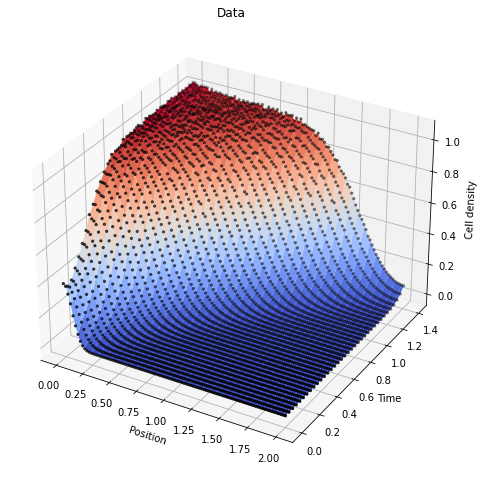

In [2]:
from Projects.Scripts.Data_Processor import *
path = os.getcwd()+'/NPY_Data/data_wider_2P_E2.npy'
save_path = 'Figures/Data_N01_2P_E2.pdf'

inputs, outputs, X, T, U, shape, data = ProcessData(path, 
                                                    t_end_idx=35, 
                                                    load_noisy=True, 
                                                    plot=True, 
                                                    save_path=save_path)

In [3]:
x = np.unique(X)
t = np.unique(T)

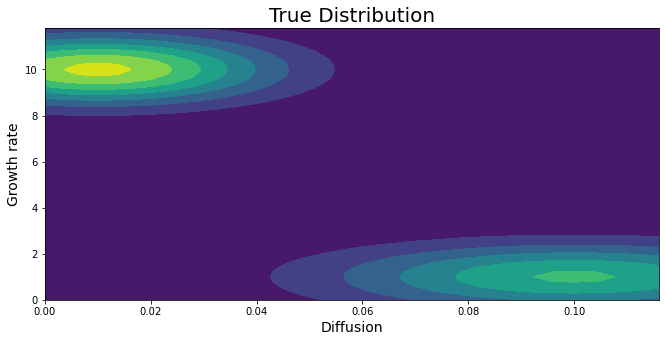

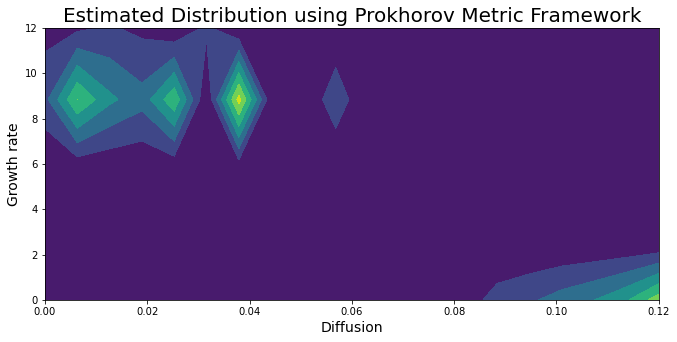

In [4]:
from Projects.Scripts.Plotters import *

max_D_nodes = 20
max_rho_nodes = 20
max_K_nodes = 1

D_min = 0.0
D_max = 0.12
rho_min = 0.0
rho_max = 12.0
K_min = 1.0
K_max = 1.0

weights_mesh = data['pdf_mesh']
# plot the true distribution
fig1, ax1 = Plot_PDF(np.reshape(data['D_params'],weights_mesh.shape), 
                   np.reshape(data['rho_params'],weights_mesh.shape),
                   weights_mesh = data['pdf_mesh'],
                   x_label='Diffusion', 
                   y_label='Growth rate',
                   title='True Distribution',
                   save_path='Figures/TrueMesh_N01_2P_E2.pdf')

numX = len(x)
numT = len(t)

#### Load the Prokhorov metric framework result
load_file = 'PMF_Results_Interp_2P_E2/best_PMF.npy'     
best_results_Interp = np.load(load_file, allow_pickle=True).item()
Interp_RSS = best_results_Interp['best_RSS']
Interp_time = best_results_Interp['total_time']/3600

D_vec = np.linspace(D_min, D_max, max_D_nodes)
rho_vec = np.linspace(rho_min, rho_max, max_rho_nodes)
K_vec = np.linspace(K_min, K_max, max_K_nodes)

num_D_node = best_results_Interp['best_numDnode']
num_rho_node = best_results_Interp['best_numRhonode']
weights = best_results_Interp['best_weights']
weights = weights.reshape((best_results_Interp['best_numDnode'],best_results_Interp['best_numRhonode']))

D_vec_idx = np.floor(np.linspace(0,max_D_nodes-1, num_D_node))
rho_vec_idx = np.floor(np.linspace(0,max_rho_nodes-1, num_rho_node))
D_vec_idx = D_vec_idx.astype(int)
rho_vec_idx = rho_vec_idx.astype(int)

D_vec = D_vec[D_vec_idx]
rho_vec = rho_vec[rho_vec_idx]

D_mesh, rho_mesh = np.meshgrid(D_vec, rho_vec, indexing='ij')
# Plot the estimated distribution 
fig2, ax2 = Plot_PDF(D_mesh, 
                   rho_mesh,
                   weights_mesh = weights,
                   x_label='Diffusion', 
                   y_label='Growth rate',
                   title='Estimated Distribution using Prokhorov Metric Framework',
                   save_path='Figures/PMFMesh_N01_2P_E2.pdf')

In [5]:
num_D_node, num_rho_node

(20, 5)

In [6]:
D_mesh, rho_mesh = np.meshgrid(D_vec, rho_vec, indexing='ij')
D_mesh = D_mesh.reshape((-1, 1))
rho_mesh = rho_mesh.reshape((-1, 1))
weights = weights.reshape((-1, 1))

PMF_params = np.concatenate((D_mesh, rho_mesh, weights), axis=1)

PMF_params = np.delete(PMF_params, (weights.T == 0)[0], axis=0)
D_mesh = np.delete(D_mesh, (weights.T == 0)[0], axis=0)
rho_mesh = np.delete(rho_mesh, (weights.T == 0)[0], axis=0)
weights = np.delete(weights, (weights.T == 0)[0], axis=0)
PMF_params = np.concatenate((D_mesh, rho_mesh, weights), axis=0)

In [7]:
from Projects.Scripts.PDEResults_Processor import *
num_run = 20
PDE_folder = os.getcwd()+'/PDE_Fitting_Results_2P_E2'
# Load 2-PDE model result
num_PDE = 2
optimized_params_2P, best_error_2P, total_2P_time = Process_PDEResults(PDE_folder, num_PDE, num_run)
# Load 4-PDE model result
num_PDE = 4
optimized_params_4P, best_error_4P, total_4P_time = Process_PDEResults(PDE_folder, num_PDE, num_run)
# Load 6-PDE model result
num_PDE = 6
optimized_params_6P, best_error_6P, total_6P_time = Process_PDEResults(PDE_folder, num_PDE, num_run)

In [8]:
num_PDE = 2
D_2P = optimized_params_2P[0:num_PDE]
K_2P = optimized_params_2P[num_PDE:2*num_PDE]
p_2P = optimized_params_2P[2*num_PDE:]

num_PDE = 4
D_4P = optimized_params_4P[0:num_PDE]
K_4P = optimized_params_4P[num_PDE:2*num_PDE]
p_4P = optimized_params_4P[2*num_PDE:]

num_PDE = 6
D_6P = optimized_params_6P[0:num_PDE]
K_6P = optimized_params_6P[num_PDE:2*num_PDE]
p_6P = optimized_params_6P[2*num_PDE:]

../../Projects/Scripts/Plotters.py:312: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f82718bea90> has a label of '_' which cannot be automatically added to the legend.
  PDF_ax.legend(figure_mods['legend_list'],loc='upper right')
../../Projects/Scripts/Plotters.py:312: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f82718bee90> has a label of '_' which cannot be automatically added to the legend.
  PDF_ax.legend(figure_mods['legend_list'],loc='upper right')
../../Projects/Scripts/Plotters.py:312: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f8271c12290> has a label of '_' which cannot be automatically added to the legend.
  PDF_ax.legend(figure_mods['legend_list'],loc='upper right')
../../Projects/Scripts/Plotters.py:312: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f8271c12690> has a label of '_' which cannot be automatically added to the legend.
  PDF_ax.legend(fi

(<Figure size 792x792 with 1 Axes>,
 <AxesSubplot:title={'center':'Estimated Parameters of 2,4,6-PDE Models'}, xlabel='Diffusion (D)', ylabel='Growth rate (rho)'>)

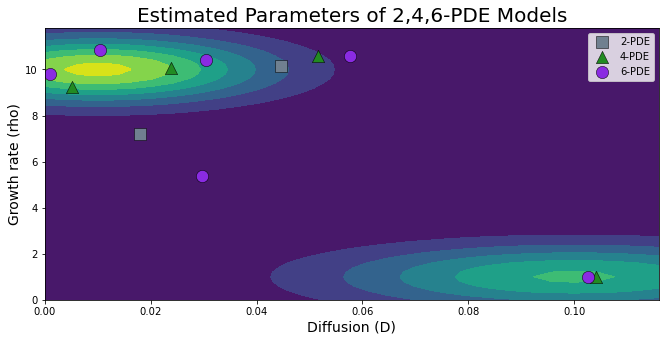

In [9]:
# plot estimated paramter from 2,4,6-PDE models on the true distribution
fig1, ax1 = Plot_PDF(np.reshape(data['D_params'],weights_mesh.shape),
                   np.reshape(data['rho_params'],weights_mesh.shape),
                   weights_mesh = data['pdf_mesh'],
                   x_label='Diffusion (D)', 
                   y_label='Growth rate (rho)',
                   title='Estimated Parameters of 2,4,6-PDE Models',
                   save_path=None)

figure_mods = {}
figure_mods['color'] = "slategrey"
figure_mods['linewidths'] = 0.5
figure_mods['marker'] = 's'
figure_mods['edgecolor'] = 'k'
figure_mods['size'] = 150
figure_mods['legend_list'] = ['_','_','_','_','_','_','_','_',
    '2-PDE', '4-PDE', '6-PDE']

Plot_CentersOnPDF(PDF_fig=fig1,
                  PDF_ax=ax1,
                  param1_center=D_2P,
                  param2_center=K_2P,
                  param1_vec=data['D_params'],
                  param2_vec=data['rho_params'],
                  figure_mods=figure_mods,
                  save_path=None)

figure_mods['color'] = "forestgreen"
figure_mods['marker'] = "^"

Plot_CentersOnPDF(PDF_fig=fig1,
                  PDF_ax=ax1,
                  param1_center=D_4P,
                  param2_center=K_4P,
                  param1_vec=data['D_params'],
                  param2_vec=data['rho_params'],
                  figure_mods=figure_mods,
                  save_path=None)

figure_mods['color'] = "blueviolet"
figure_mods['marker'] = "o"

Plot_CentersOnPDF(PDF_fig=fig1,
                  PDF_ax=ax1,
                  param1_center=D_6P,
                  param2_center=K_6P,
                  param1_vec=data['D_params'],
                  param2_vec=data['rho_params'],
                  figure_mods=figure_mods,
                  save_path='Figures/246PDE_vs_True_N01_2P_E2.pdf')

In [10]:
def PDE_RHS(t,u,x,params,K,num_PDE):
    
    ''' returns a RHS of the RDE/PDE models
    '''
    
    #
    n = len(x)
    e = np.ones((n,))
    A = spdiags([e,-2*e,e], [-1,0,1], n, n)
    A = A.todense()
    A[0,1] = 2
    A[-1,-2] = 2
    dx = x[1] - x[0]
    
    #
    Ds = params[0:num_PDE]
    rhoS = params[num_PDE:2*num_PDE]
    
    #
    u = u.reshape((num_PDE,len(x)))
    u_sum = np.sum(u, axis=0)

    #
    rhs = np.zeros_like(u)
    for i in np.arange(num_PDE):
        rhs[i,:] = Ds[i]*A.dot(u[i,:])/dx**2 + rhoS[i]*u[i,:]*(1 - u_sum/K)
    
    #
    rhs = rhs.reshape((1,-1))[0]
    
    return rhs

def PDE_sim(RHS,u0,x,t,params,K,num_PDE):
    ''' run simulation for the PDE models and return the solutions
    '''
    #
    t_min = np.min(t)
    t_max = np.max(t)
    t_data = t
    
    #
    IC = np.zeros((num_PDE,len(x)))
    weights = params[2*num_PDE:]
    for i in np.arange(num_PDE):
        IC[i,:] = u0*weights[i]
    
    IC = IC.reshape((1,-1))[0]
    
    #make RHS a function of t,y
    def RHS_ty(t,y):
        return RHS(t,y,x,params,K,num_PDE)
    sol = integrate.solve_ivp(RHS_ty, t_span=[t_min, t_max], y0=IC, method='RK45', t_eval = t)
    
    u = sol.y
    
    return u

In [11]:
x = np.unique(X)
t = np.unique(T)
u0 = U[:,0]

K = 1.0
RHS = PDE_RHS

num_PDE = 2
u_sim_2P = PDE_sim(RHS,u0,x,t,optimized_params_2P,K,num_PDE)
u_sim_2P = u_sim_2P.reshape((num_PDE,len(x),len(t)))
u_sim_2P = np.sum(u_sim_2P, axis=0)

num_PDE = 4
u_sim_4P = PDE_sim(RHS,u0,x,t,optimized_params_4P,K,num_PDE)
u_sim_4P = u_sim_4P.reshape((num_PDE,len(x),len(t)))
u_sim_4P = np.sum(u_sim_4P, axis=0)

num_PDE = 6
u_sim_6P = PDE_sim(RHS,u0,x,t,optimized_params_6P,K,num_PDE)
u_sim_6P = u_sim_6P.reshape((num_PDE,len(x),len(t)))
u_sim_6P = np.sum(u_sim_6P, axis=0)

num_PDE = len(weights)
u_sim_PMF = PDE_sim(RHS,u0,x,t,PMF_params,K,num_PDE)
u_sim_PMF = u_sim_PMF.reshape((num_PDE,len(x),len(t)))
u_sim_PMF = np.sum(u_sim_PMF, axis=0)

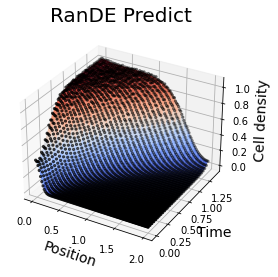

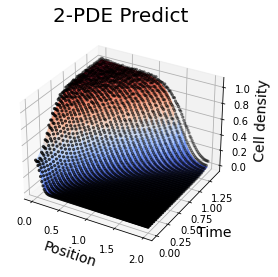

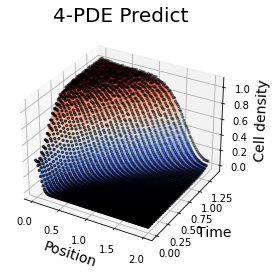

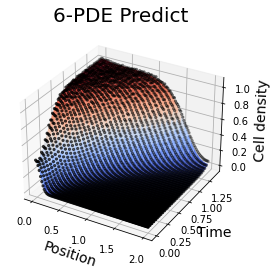

In [12]:
# Plot the fitting and predicting cell density surface
Plot_SurfaceFitting(X, T, u_sim_PMF, U,
                    title='RanDE Predict',
                    save_path='Figures/PMF_Predict_N01_2P_E2.pdf')

Plot_SurfaceFitting(X, T, u_sim_2P, U,
                    title='2-PDE Predict',
                    save_path='Figures/2PDE_Predict_N01_2P_E2.pdf')

Plot_SurfaceFitting(X, T, u_sim_4P, U,
                    title='4-PDE Predict',
                    save_path='Figures/4PDE_Predict_N01_2P_E2.pdf')

Plot_SurfaceFitting(X, T, u_sim_6P, U,
                    title='6-PDE Predict',
                    save_path='Figures/6PDE_Predict_N01_2P_E2.pdf')

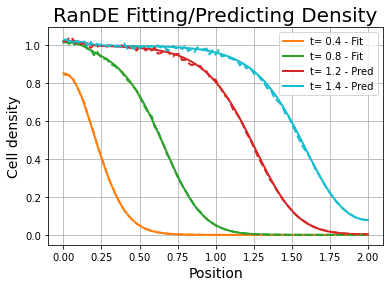

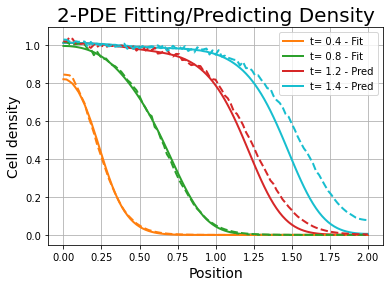

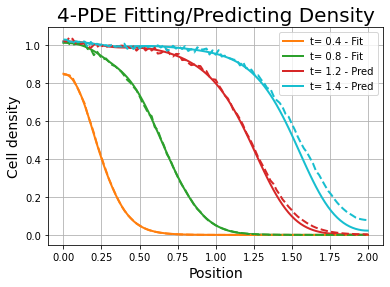

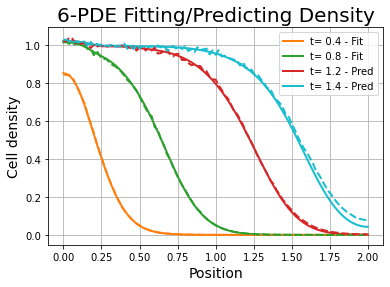

In [13]:
# Plot the fitting and predicting cell density over time
tPlot_idx = [10, 20, 30, -1]
legend_list = ['t= 0.4 - Fit', 't= 0.8 - Fit', 't= 1.2 - Pred', 't= 1.4 - Pred']

Plot_UvsX(X, T, u_sim_PMF, U, 
              t_plot_idcs=tPlot_idx,
              title='RanDE Fitting/Predicting Density',
              legend_list=legend_list,
              save_path='Figures/PMF_Predict_Curves_N01_2P_E2.pdf')
Plot_UvsX(X, T, u_sim_2P, U, 
              t_plot_idcs=tPlot_idx,
              title='2-PDE Fitting/Predicting Density',
              legend_list=legend_list,
              save_path='Figures/2PDE_Predict_Curves_N01_2P_E2.pdf')
Plot_UvsX(X, T, u_sim_4P, U, 
              t_plot_idcs=tPlot_idx,
              title='4-PDE Fitting/Predicting Density',
              legend_list=legend_list,
              save_path='Figures/4PDE_Predict_Curves_N01_2P_E2.pdf')
Plot_UvsX(X, T, u_sim_6P, U, 
              t_plot_idcs=tPlot_idx,
              title='6-PDE Fitting/Predicting Density',
              legend_list=legend_list,
              save_path='Figures/6PDE_Predict_Curves_N01_2P_E2.pdf')

# Compare the computational cost

In [14]:
nums_PDEs = [2, 4, 6]
PDE_errors = [best_error_2P, best_error_4P, best_error_6P]
PDE_times = [total_2P_time, total_4P_time, total_6P_time]

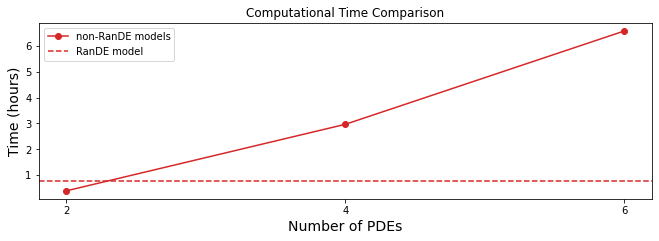

In [15]:
figure_mods = {}
figure_mods['color'] = 'tab:red'
figure_mods['marker'] = marker="o"
figure_mods['ylabel'] = 'Time (hours)'

fig, ax = Plot_ErrorComparison(nums_PDEs=nums_PDEs,
                               PDE_errors=PDE_times,
                               PMF_error=Interp_time,
                               figure_mods=figure_mods,
                               title='Computational Time Comparison',
                               save_path='Figures/Compare_Time_2P_E2.pdf')
ax.legend(['non-RanDE models', 'RanDE model'])
fig.savefig('Figures/Compare_Time_2P_E2.pdf',bbox_inches='tight')

# Compute Prediction Error

In [16]:
# Compute the fitting error
PMF_fit_error = sum(sum((u_sim_PMF[:,:26] - U[:,:26])**2))
PDE2_fit_error = sum(sum((u_sim_2P[:,:26] - U[:,:26])**2))
PDE4_fit_error = sum(sum((u_sim_4P[:,:26] - U[:,:26])**2))
PDE6_fit_error = sum(sum((u_sim_6P[:,:26] - U[:,:26])**2))
# Compute the prediction error
PMF_pred_error = sum(sum((u_sim_PMF[:,26:] - U[:,26:])**2))
PDE2_pred_error = sum(sum((u_sim_2P[:,26:] - U[:,26:])**2))
PDE4_pred_error = sum(sum((u_sim_4P[:,26:] - U[:,26:])**2))
PDE6_pred_error = sum(sum((u_sim_6P[:,26:] - U[:,26:])**2))

In [17]:
nums_PDEs = [2, 4, 6]
PDE_times = [total_2P_time, total_4P_time, total_6P_time]
PDE_fit_errors  = [PDE2_fit_error, PDE4_fit_error, PDE6_fit_error]
PDE_pred_errors = [PDE2_pred_error, PDE4_pred_error, PDE6_pred_error]

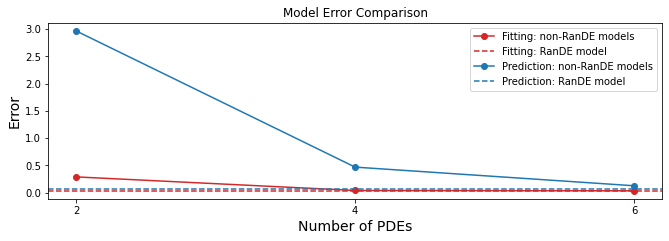

In [18]:
# Make error comparison plot
figure_mods = {}
figure_mods['color'] = "tab:red"
figure_mods['marker'] = "o"
figure_mods['ylabel'] = "Error"

fig, ax = Plot_ErrorComparison(nums_PDEs=nums_PDEs,
                               PDE_errors=PDE_fit_errors,
                               PMF_error=PMF_fit_error,
                               figure_mods=figure_mods,
                               title='Model Error Comparison',
                               save_path=None)

ax.plot(nums_PDEs, PDE_pred_errors, color="tab:blue", marker="o")
ax.axhline(y = PMF_pred_error, color = 'tab:blue', linestyle='dashed')
ax.legend(['Fitting: non-RanDE models', 'Fitting: RanDE model', 'Prediction: non-RanDE models', 'Prediction: RanDE model'])
fig.savefig('Figures/Compare_Fit_Pred_Error_2P_E2.pdf',bbox_inches='tight')
plt.show()

# Compute Wavespeed

In [19]:
def compute_wavespeed(U, x, t, t_before_idx, t_after_idx, densities):
    ''' return the list of wavespeed with respected to the densities
    '''
    #
    c_list = []
    
    # Compute delta t
    delta_t = t[t_after_idx] - t[t_before_idx]
    
    # 
    x_interp = np.linspace(min(x), max(x), 1000000)
    
    # Get density arrays
    u_before = U[:, t_before_idx]
    u_after  = U[:, t_after_idx]
    
    # Interpolate u before
    interp = interpolate.interp1d(x,u_before)
    u_before_interp = interp(x_interp)
    
    # Interpolate u after
    interp = interpolate.interp1d(x,u_after)
    u_after_interp = interp(x_interp)
    
    for density in densities:
    
        # Find density idx
        before_idx = np.where(abs(u_before_interp-density) == min(abs(u_before_interp-density)))[0][0]
        after_idx = np.where(abs(u_after_interp-density) == min(abs(u_after_interp-density)))[0][0]

        # Compute wavespeed
        c = (x_interp[after_idx] - x_interp[before_idx])/delta_t
        c_list.append(c)
        
    return c_list

In [20]:
# Note: we ignored some early time points because the wave might not be stable
# and the cell densities might not reach the chosen densities
Tbf_idx = 15
Taf_idx = 25

densities = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]

data_wave_speed_fit = compute_wavespeed(U, x, t, Tbf_idx, Taf_idx, densities)
PMF_wave_speed_fit  = compute_wavespeed(u_sim_PMF, x, t, Tbf_idx, Taf_idx, densities)
PDE2_wave_speed_fit = compute_wavespeed(u_sim_2P, x, t, Tbf_idx, Taf_idx, densities)
PDE4_wave_speed_fit = compute_wavespeed(u_sim_4P, x, t, Tbf_idx, Taf_idx, densities)
PDE6_wave_speed_fit = compute_wavespeed(u_sim_6P, x, t, Tbf_idx, Taf_idx, densities)

In [21]:
# Get the min and max wavespeed for plotting on the same scale
max_fit = max(max(data_wave_speed_fit), 
              max(PMF_wave_speed_fit),
              max(PDE2_wave_speed_fit),
              max(PDE4_wave_speed_fit),
              max(PDE6_wave_speed_fit))

min_fit = min(min(data_wave_speed_fit), 
              min(PMF_wave_speed_fit),
              min(PDE2_wave_speed_fit),
              min(PDE4_wave_speed_fit),
              min(PDE6_wave_speed_fit))
max_fit, min_fit

(1.3628063628063627, 1.2529412529412527)

In [22]:
Tbf_idx = 25
Taf_idx = 35

densities = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]

data_wave_speed_pred = compute_wavespeed(U, x, t, Tbf_idx, Taf_idx, densities)
PMF_wave_speed_pred  = compute_wavespeed(u_sim_PMF, x, t, Tbf_idx, Taf_idx, densities)
PDE2_wave_speed_pred = compute_wavespeed(u_sim_2P, x, t, Tbf_idx, Taf_idx, densities)
PDE4_wave_speed_pred = compute_wavespeed(u_sim_4P, x, t, Tbf_idx, Taf_idx, densities)
PDE6_wave_speed_pred = compute_wavespeed(u_sim_6P, x, t, Tbf_idx, Taf_idx, densities)

In [23]:
# Get the min and max wavespeed for plotting on the same scale
max_pred = max(max(data_wave_speed_pred), 
              max(PMF_wave_speed_pred),
              max(PDE2_wave_speed_pred),
              max(PDE4_wave_speed_pred),
              max(PDE6_wave_speed_pred))

min_pred = min(min(data_wave_speed_pred), 
              min(PMF_wave_speed_pred),
              min(PDE2_wave_speed_pred),
              min(PDE4_wave_speed_pred),
              min(PDE6_wave_speed_pred))

max_pred, min_pred

(1.6273166273166269, 1.3006063006063002)

(<Figure size 792x792 with 1 Axes>,
 <AxesSubplot:title={'center':'Wave speed in fitting interval'}, xlabel='Density', ylabel='Wave speed'>)

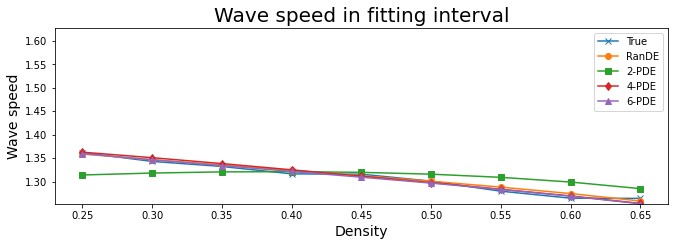

In [24]:
# Plot the wavespeed in the fitting interval
Plot_WaveSpeedComparison(densities,
                         data_wave_speed_fit,
                         PMF_wave_speed_fit,
                         PDE2_wave_speed_fit,
                         PDE4_wave_speed_fit,
                         PDE6_wave_speed_fit,
                         ylim=[min(min_pred, min_fit),max(max_pred, max_fit)],
                         title="Wave speed in fitting interval",
                         save_path='Figures/Wavespeed_Fit_2P_E2.pdf')

(<Figure size 792x792 with 1 Axes>,
 <AxesSubplot:title={'center':'Wave speed in prediction interval'}, xlabel='Density', ylabel='Wave speed'>)

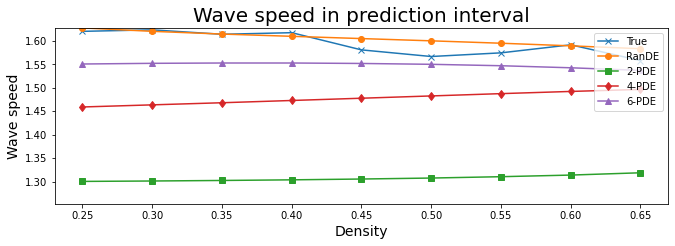

In [25]:
# Plot the wavespeed in the prediction interval
Plot_WaveSpeedComparison(densities,
                         data_wave_speed_pred,
                         PMF_wave_speed_pred,
                         PDE2_wave_speed_pred,
                         PDE4_wave_speed_pred,
                         PDE6_wave_speed_pred,
                         ylim=[min(min_pred, min_fit),max(max_pred, max_fit)],
                         title="Wave speed in prediction interval",
                         save_path='Figures/Wavespeed_Predict_2P_E2.pdf')